# Credit Score Dataset Part 2: Modelling

### IV. Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import datasets, preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

#### 1. Read data

In [3]:
# Read clean data
df_train = pd.read_csv('clean_train.csv')
df_test = pd.read_csv('clean_test.csv')

display(df_train.shape, df_test.shape)

(100000, 23)

(50000, 22)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Annual_Income                  50000 non-null  float64
 2   Monthly_Inhand_Salary          50000 non-null  float64
 3   Num_Bank_Accounts              50000 non-null  float64
 4   Num_Credit_Card                50000 non-null  float64
 5   Interest_Rate                  50000 non-null  float64
 6   Num_of_Loan                    50000 non-null  float64
 7   Delay_from_due_date            50000 non-null  float64
 8   Num_of_Delayed_Payment         50000 non-null  float64
 9   Changed_Credit_Limit           50000 non-null  float64
 10  Num_Credit_Inquiries           50000 non-null  float64
 11  Outstanding_Debt               50000 non-null  float64
 12  Credit_Utilization_Ratio       50000 non-null 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            100000 non-null  float64
 1   Annual_Income                  100000 non-null  float64
 2   Monthly_Inhand_Salary          100000 non-null  float64
 3   Num_Bank_Accounts              100000 non-null  float64
 4   Num_Credit_Card                100000 non-null  float64
 5   Interest_Rate                  100000 non-null  float64
 6   Num_of_Loan                    100000 non-null  float64
 7   Delay_from_due_date            100000 non-null  float64
 8   Num_of_Delayed_Payment         100000 non-null  float64
 9   Changed_Credit_Limit           100000 non-null  float64
 10  Num_Credit_Inquiries           100000 non-null  float64
 11  Outstanding_Debt               100000 non-null  float64
 12  Credit_Utilization_Ratio       

In [6]:
df_train['Credit_Score'].value_counts(normalize=True).sort_index()

Good        0.17828
Poor        0.28998
Standard    0.53174
Name: Credit_Score, dtype: float64

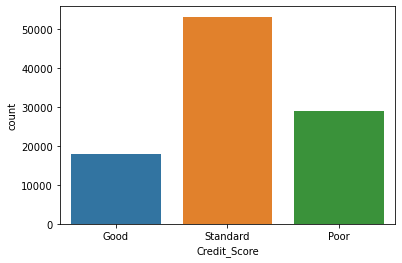

In [7]:
sns.countplot(x='Credit_Score', data=df_train)
plt.show()

#### 2. Train/Test Split

In [8]:
X = df_train.drop(columns='Credit_Score')
y = df_train['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70000, 22), (70000,), (30000, 22), (30000,))

In [9]:
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Loan_Type_Count,Occupation_Encoded,Credit_Mix_Encoded,Payment_of_Min_Amount_Encoded,Payment_Behaviour_Encoded
0,23.0,19114.12,1824.84,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,26.822620,22.08,49.574949,80.42,312.49,4,0.067353,0.303753,0.356773,0.122513
1,23.0,19114.12,1824.84,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,...,31.944960,22.17,49.574949,118.28,284.63,4,0.067353,0.303753,0.356773,0.113027
2,23.0,19114.12,1824.84,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,28.609352,22.25,49.574949,81.70,331.21,4,0.067353,0.303753,0.356773,0.149433
3,23.0,19114.12,1824.84,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,31.377862,22.33,49.574949,199.46,223.45,4,0.067353,0.303753,0.356773,0.275173
4,23.0,19114.12,1824.84,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,24.797347,22.42,49.574949,41.42,341.49,4,0.067353,0.303753,0.356773,0.191400


In [10]:
X.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Loan_Type_Count', 'Occupation_Encoded',
       'Credit_Mix_Encoded', 'Payment_of_Min_Amount_Encoded',
       'Payment_Behaviour_Encoded'],
      dtype='object')

#### 3. Standardisation

In [11]:
from sklearn import preprocessing

# apply standardisation to explanatory variables
# Build scaler on the train set
std_scaler = preprocessing.StandardScaler().fit(X_train)

# Standardise the train set
X_train_std = std_scaler.transform(X_train)

# Standardise the test set
X_test_std = std_scaler.transform(X_test)

#### 4. Decision Tree

Accuracy: 0.68


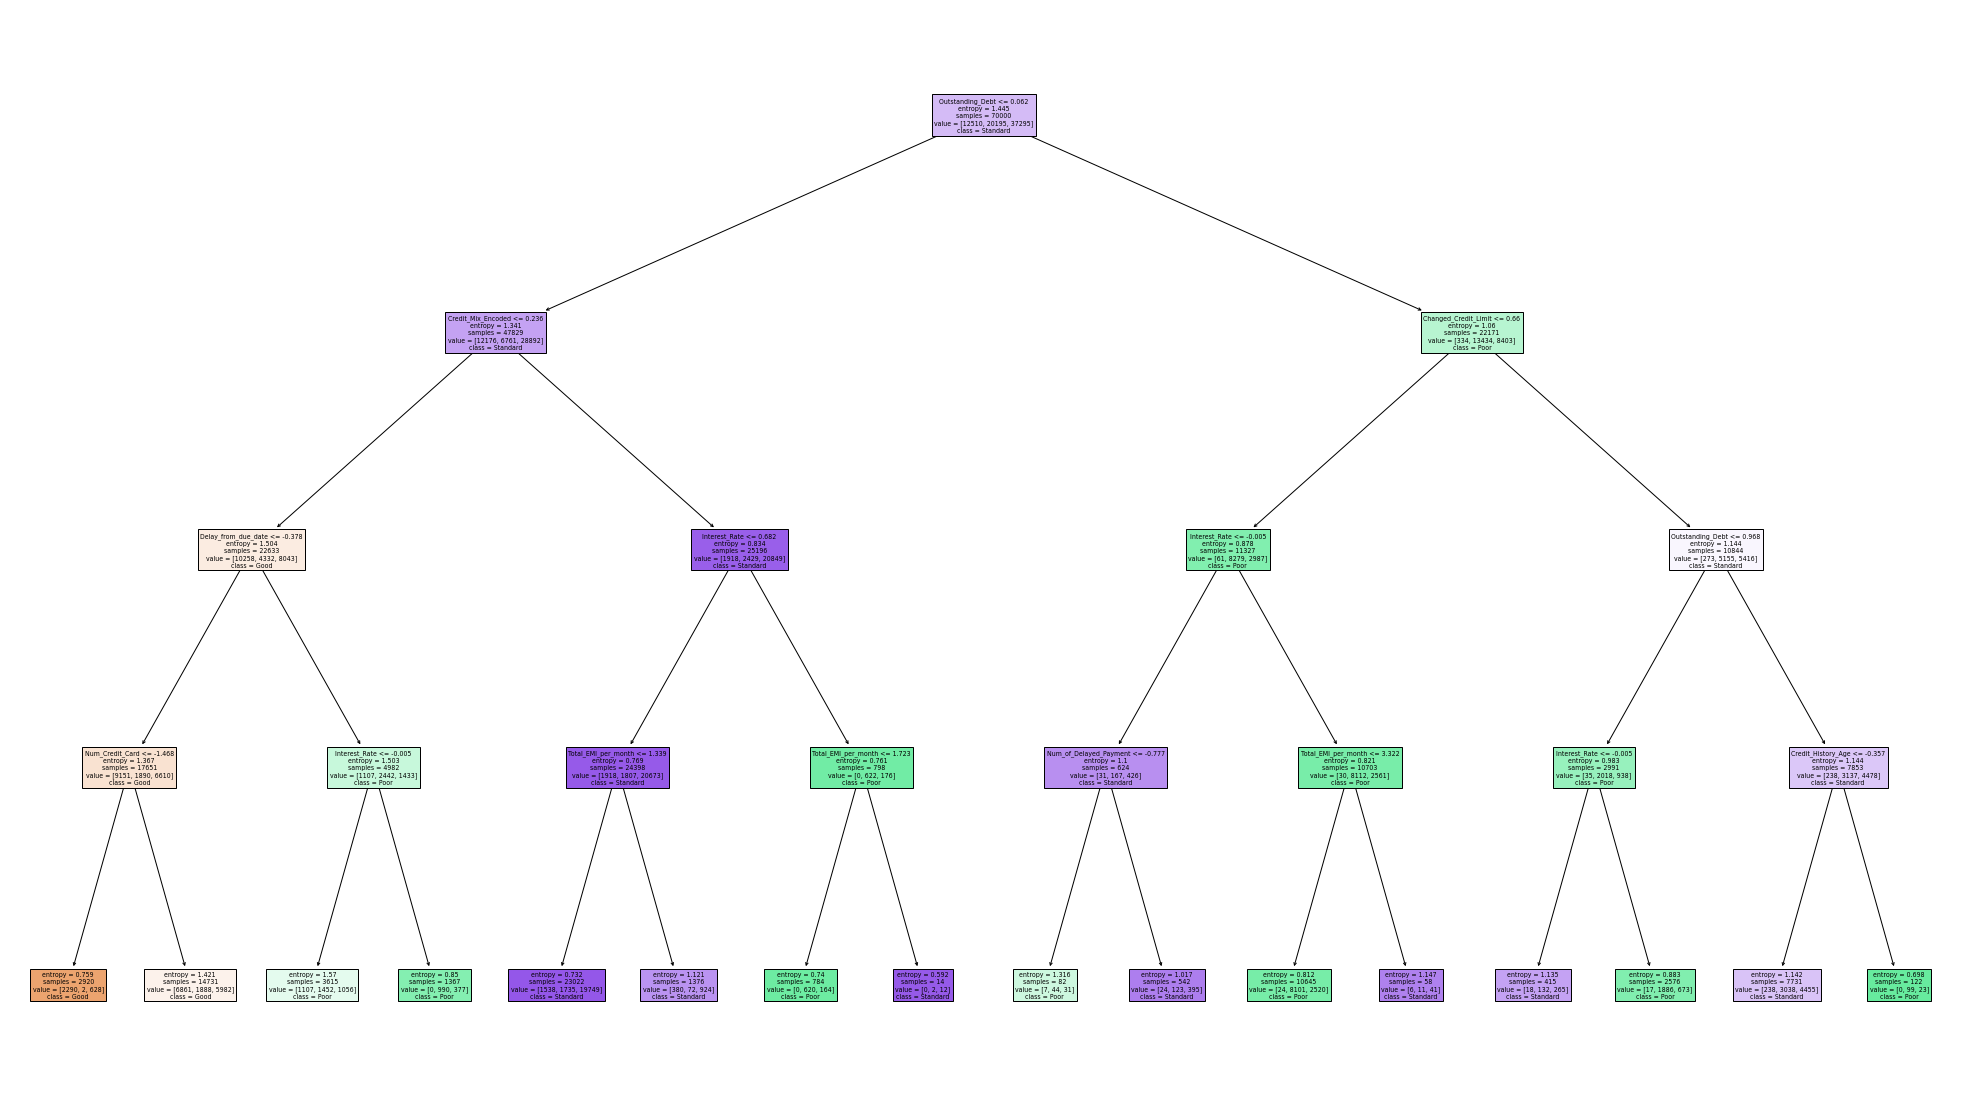

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(35,20))


t = tree.plot_tree(clf, feature_names=('Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Loan_Type_Count', 'Occupation_Encoded',
       'Credit_Mix_Encoded', 'Payment_of_Min_Amount_Encoded',
       'Payment_Behaviour_Encoded'),
                   class_names=['Good', 'Poor', 'Standard'],
                   filled=True)

#### 5. Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.66
